In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

In [3]:
# Load data
X = pd.read_csv('X_resampled.csv')
y = pd.read_csv('y_resampled.csv')

In [4]:
if y.shape[1] == 1:
    y = y.values.ravel()

In [5]:
# Split the data: 80% train, 10% validation, 10% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use softmax with units>1 for multi-class
])

c:\Users\ayank_hyn0aug\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [10]:

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/20


339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0369 - val_accuracy: 0.9830 - val_loss: 0.0552
Epoch 2/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0273 - val_accuracy: 0.9897 - val_loss: 0.0529
Epoch 3/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0277 - val_accuracy: 0.9911 - val_loss: 0.0539
Epoch 4/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9894 - loss: 0.0298 - val_accuracy: 0.9860 - val_loss: 0.0518
Epoch 5/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9918 - loss: 0.0265 - val_accuracy: 0.9852 - val_loss: 0.0560
Epoch 6/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9934 - loss: 0.0227 - val_accuracy: 0.9882 - val_loss: 0.0570
Epoch 7/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9942 - loss: 0.0189 - val_accuracy: 0.9911 - val_loss: 0.0544
Epoch 8/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9945 - loss: 0.0194 - val_accuracy: 0.9904 - val_

In [13]:
# Predict probabilities and convert to class labels
def get_predictions(X, threshold=0.5):
    probs = model.predict(X)
    return (probs > threshold).astype(int).flatten()

339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5406
           1       0.99      1.00      1.00      5421

    accuracy                           1.00     10827
   macro avg       1.00      1.00      1.00     10827
weighted avg       1.00      1.00      1.00     10827



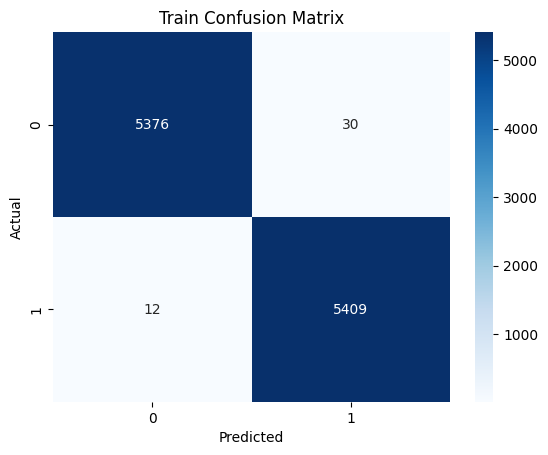

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       705
           1       0.99      0.99      0.99       648

    accuracy                           0.99      1353
   macro avg       0.99      0.99      0.99      1353
weighted avg       0.99      0.99      0.99      1353



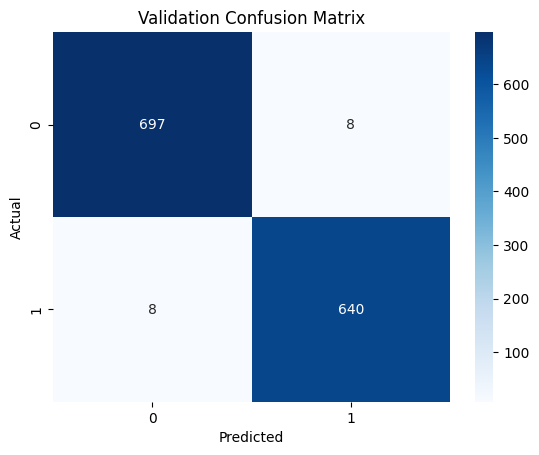

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       656
           1       0.99      0.99      0.99       698

    accuracy                           0.99      1354
   macro avg       0.99      0.99      0.99      1354
weighted avg       0.99      0.99      0.99      1354



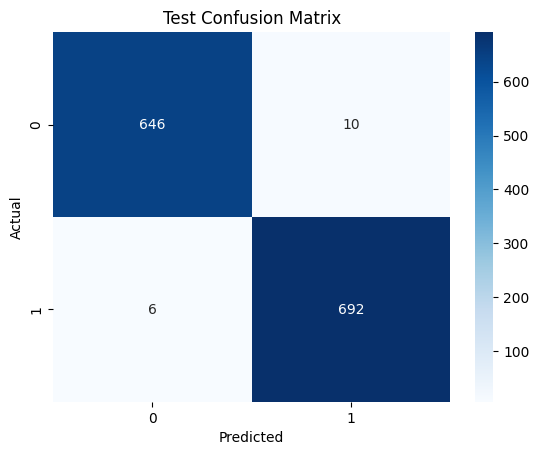

In [20]:
datasets = {
    'Train': (X_train, y_train),
    'Validation': (X_val, y_val),
    'Test': (X_test, y_test)
}

for name, (X_set, y_true) in datasets.items():
    y_pred = get_predictions(X_set)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()